In [ ]:
# !pip install tensorflow==1.14.0

In [ ]:
import pickle

In [ ]:
!pip install mtcnn

In [ ]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [ ]:
import numpy as np
import pandas as pd
import cv2
from mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

In [ ]:
# I have no idea who is the author of the code
# in this cell that saves an image from a webcam
# inside google colab.
# It comes from a notebook called "📸 Take a photo with your webcam"

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=1.0, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return Image.open(f)
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return len(binary)


In [ ]:
img = take_photo() # click


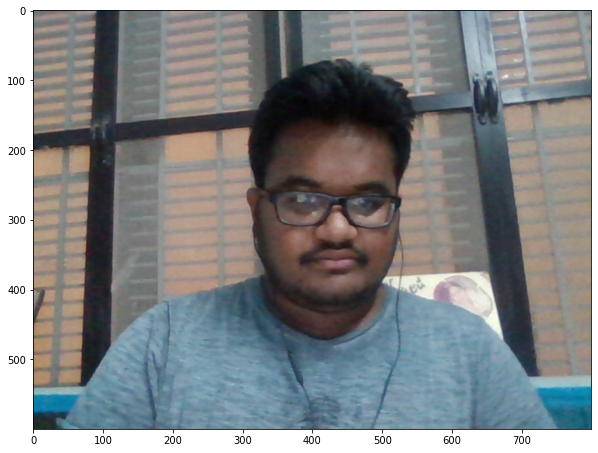

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(np.asarray(img))
plt.show()

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()                       
# drive = GoogleDrive(gauth)

In [ ]:
file_obj = drive.CreateFile({'id': '1X7LfoTxcKGAeu8eWw7MSfwBK4v_A-oW2'})
file_obj.GetContentFile('Face_model_Simple.sav')

In [ ]:
filename = 'Face_model_Simple.sav'

In [ ]:
import pickle
model = pickle.load(open(filename, 'rb'))

In [ ]:
def extract_face(img, required_size=(160, 160)):
    image = img
    image = image.convert('RGB')
    pixels = np.asarray(image)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

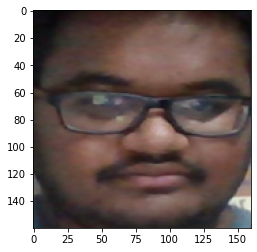

(160, 160, 3)


In [ ]:
pixels = extract_face(img)
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [ ]:
file_obj = drive.CreateFile({'id': '1zMf8boUUxWU1e9ccMMZZ-rdWdg9MDEkU'})
file_obj.GetContentFile('facenet_keras.h5')

In [ ]:
file = 'facenet_keras.h5'

In [ ]:
facenet_model = load_model('facenet_keras.h5')
print('Loaded Model')

Loaded Model


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
def get_embedding(model, face):
    face = face.astype('float32')
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    sample = np.expand_dims(face, axis=0)
    yhat = model.predict(sample)
    return yhat[0]

In [ ]:
emd = get_embedding(facenet_model, pixels)

In [ ]:
emdTrainX = np.asarray(emd)
print(emdTrainX.shape)


(128,)


In [ ]:
yhat_class = model.predict(emdTrainX.reshape(1, -1))
yhat_prob = model.predict_proba(emdTrainX.reshape(1, -1))

In [ ]:
class_index = yhat_class[0]
class_probability = yhat_prob * 100

In [ ]:
predicted = {'Nikitha':0, 'Rahul':1}
Prob = int(predicted[class_index])

In [ ]:
print('Predicted: %s (%.3f)' % (class_index, class_probability[0][Prob]))

Predicted: Rahul (87.611)


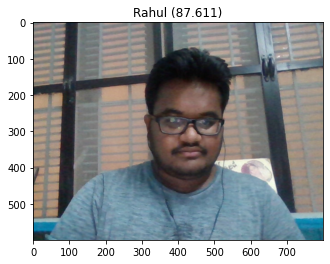

In [ ]:
plt.imshow(img)
title = '%s (%.3f)' % (class_index, class_probability[0][Prob])
plt.title(title)
plt.show()

In [ ]:
detector = MTCNN()